## Import the requited packages

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import pickle
import os
import seaborn as sns
import glob
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

## Importing the data

In [51]:
RawData = pd.read_csv('./DATA_1.csv', sep=',', index_col=0, header='infer')
#print(RawData)
RawData.index = pd.to_datetime(RawData.index, format='ISO8601')
# RawData.index = RawData.index.strftime('%d-%m-%Y %H:%M')
print('                       R A W    D A T A')
print('==================================================================================================')
RawData.head()

                       R A W    D A T A


,House_1,House_2,House_3,House_4,House_5,House_6,House_7,House_8,House_9,House_10
Time,,,,,,,,,,
2013-01-01 01:00:00,0.127,1.855,0.061,1.216,0.132,0.173,0.352,1.554,0.091,0.160
2013-01-01 02:00:00,0.177,1.437,0.060,0.707,0.132,0.171,0.440,0.717,0.092,0.179
2013-01-01 03:00:00,0.147,1.077,0.055,0.452,0.144,0.158,0.140,0.380,0.327,0.304
2013-01-01 04:00:00,0.133,1.065,0.061,0.351,0.142,0.167,0.128,0.364,0.067,0.065
2013-01-01 05:00:00,0.131,0.859,1.455,0.194,0.205,0.170,0.123,0.320,0.066,0.074


## Creating data structure

In [53]:
data = RawData.sum(1)      #Sum the load of all houses
#data = RawData['House_1'] #Single house load
data_array = data.to_numpy()
data = pd.DataFrame(data_array, columns=['Load'])
data.index = RawData.index
## preview the data
data.head()

,Load
Time,
2013-01-01 01:00:00,5.721
2013-01-01 02:00:00,4.112
2013-01-01 03:00:00,3.184
2013-01-01 04:00:00,2.543
2013-01-01 05:00:00,3.597


## Importing Weather Data

In [55]:
weatherData = pd.read_csv('./weatherDataLondon.csv', sep=',', header='infer')
weatherData.index = pd.to_datetime(weatherData.index)
temperatureData = weatherData['temperature']

In [56]:
ts = data.index
#print(ts)

# Train/test split

In this project, the data set is used to train/test, so it is necessary to split it into approximately 80/20


In [58]:
endTrainIndex = np.where(data.index.month==9)[0][0]+1
startTestIndex = endTrainIndex
endTestIndex = np.where(data.index.month==11)[0][0]+1
print(' TRAINING DATA')
print(' --------------------------')
print(' Start Train Index:',0)
print(' End Train Index:',endTrainIndex)
print(' TEST DATA')
print(' --------------------------')
print(' Start Test Index:',startTestIndex)
print(' End Test Index:',endTestIndex)

 TRAINING DATA
 --------------------------
 Start Train Index: 0
 End Train Index: 5832
 TEST DATA
 --------------------------
 Start Test Index: 5832
 End Test Index: 7296


## Ploting data, training and test sets

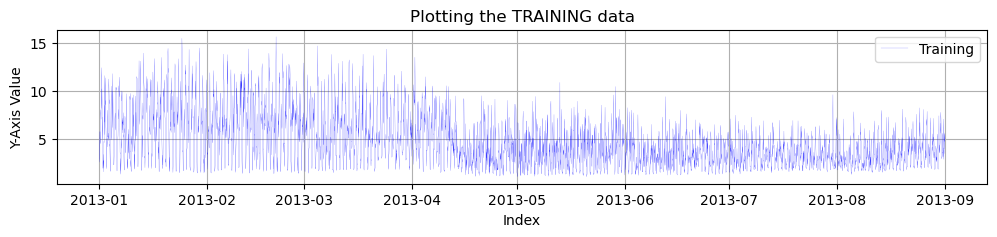

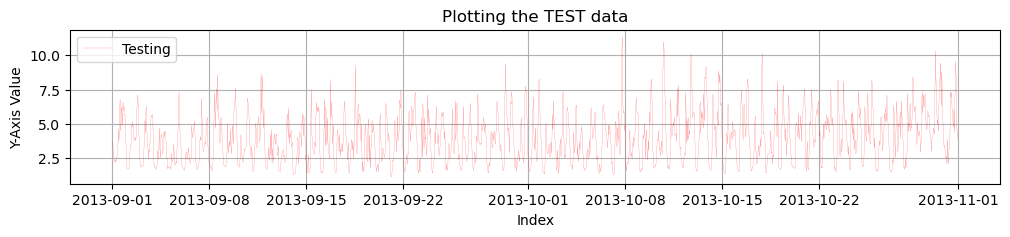

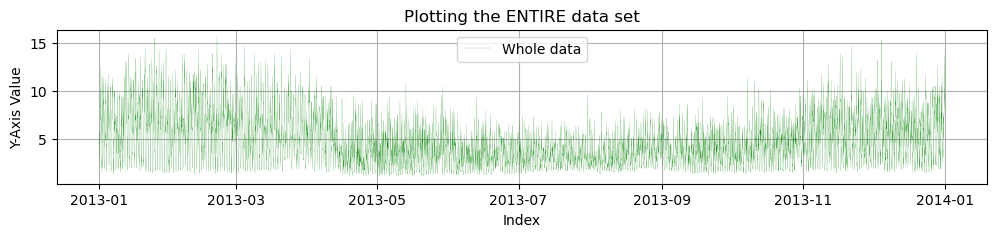

In [60]:
plt.figure(figsize=(12, 2))
#plt.plot(data.index.to_numpy(), data.Load.to_numpy(), label='Whole data',color='green',linewidth=0.1)
plt.plot(data.index[0:endTrainIndex].to_numpy(), data.Load[0:endTrainIndex].to_numpy(), label='Training',color='blue',linewidth=0.1)
#plt.plot(data.index[startTestIndex:endTestIndex].to_numpy(), data.Load[startTestIndex:endTestIndex].to_numpy(), label='Testing',color='red',linewidth=0.1)
plt.xlabel('Index')
plt.ylabel('Y-Axis Value')
plt.title('Plotting the TRAINING data')
plt.legend()
plt.grid(True)
plt.show()
# -------------------------------------------------------------------
plt.figure(figsize=(12, 2))
#plt.plot(data.index.to_numpy(), data.Load.to_numpy(), label='Whole data',color='green',linewidth=0.1)
#plt.plot(data.index[0:endTrainIndex].to_numpy(), data.Load[0:endTrainIndex].to_numpy(), label='Training',color='blue',linewidth=0.1)
plt.plot(data.index[startTestIndex:endTestIndex].to_numpy(), data.Load[startTestIndex:endTestIndex].to_numpy(), label='Testing',color='red',linewidth=0.1)
plt.xlabel('Index')
plt.ylabel('Y-Axis Value')
plt.title('Plotting the TEST data')
plt.legend()
plt.grid(True)
plt.show()
# -------------------------------------------------------------------
plt.figure(figsize=(12, 2))
plt.plot(data.index.to_numpy(), data.Load.to_numpy(), label='Whole data',color='green',linewidth=0.1)
plt.xlabel('Index')
plt.ylabel('Y-Axis Value')
plt.title('Plotting the ENTIRE data set')
plt.legend()
plt.grid(True)
plt.show()

## Create **Multilayer Perceptron model** (NN1)

In [62]:
NN1 = Sequential()

In [63]:
NN1.add(Dense(units=4, input_dim=2, activation='relu'))
#NN1.add(Dense(units=4, input_dim=2, activation='tanh'))
#NN1.add(Dense(units=4, input_dim=2, activation='sigmoid'))

NN1.add(Dense(units=1))
NN1.compile(loss='mean_squared_error', optimizer='adam')

## Defining the features

In [65]:
features = np.zeros((endTestIndex-24,2))
features[:,0] = data.Load[0:endTestIndex-24]
features[:,1] = temperatureData[24:endTestIndex]
yData = data.Load[24:endTestIndex].values
print(features)

[[ 5.721  3.98 ]
 [ 4.112  3.68 ]
 [ 3.184  3.58 ]
 ...
 [ 5.114 12.77 ]
 [ 3.786 12.98 ]
 [ 3.314 12.98 ]]


In [66]:
training_Features = features[0:endTrainIndex-24,:]
print(' TRAINING Features')
print(' --------------------------')
print(training_Features)
print(' TESTING Features')
print(' --------------------------')
testing_Features = features[endTrainIndex-24:,:]
print(testing_Features)
yData_Train = yData[0:endTrainIndex-24]
yData_Test = yData[endTrainIndex-24:]

 TRAINING Features
 --------------------------
[[ 5.721  3.98 ]
 [ 4.112  3.68 ]
 [ 3.184  3.58 ]
 ...
 [ 7.11  14.5  ]
 [ 5.712 14.87 ]
 [ 4.282 12.78 ]]
 TESTING Features
 --------------------------
[[ 3.407 11.99 ]
 [ 3.175 11.48 ]
 [ 2.974 11.15 ]
 ...
 [ 5.114 12.77 ]
 [ 3.786 12.98 ]
 [ 3.314 12.98 ]]


## Perfoming Training

In [97]:
NN1.fit(training_Features,yData_Train, epochs=10, batch_size= 100, verbose=2)

Epoch 1/10
59/59 - 0s - loss: 5.0398 - 41ms/epoch - 697us/step
Epoch 2/10
59/59 - 0s - loss: 4.6269 - 78ms/epoch - 1ms/step
Epoch 3/10
59/59 - 0s - loss: 4.2422 - 39ms/epoch - 662us/step
Epoch 4/10
59/59 - 0s - loss: 3.8930 - 37ms/epoch - 628us/step
Epoch 5/10
59/59 - 0s - loss: 3.5817 - 38ms/epoch - 644us/step
Epoch 6/10
59/59 - 0s - loss: 3.3276 - 41ms/epoch - 696us/step
Epoch 7/10
59/59 - 0s - loss: 3.1246 - 38ms/epoch - 644us/step
Epoch 8/10
59/59 - 0s - loss: 2.9730 - 42ms/epoch - 711us/step
Epoch 9/10
59/59 - 0s - loss: 2.8606 - 41ms/epoch - 695us/step
Epoch 10/10
59/59 - 0s - loss: 2.7839 - 40ms/epoch - 679us/step


## Performing Prediction using the Traing Features

In [100]:
trainingNN1 = NN1.predict(training_Features)
testingNN1 = NN1.predict(testing_Features)

46/46 [==============================] - 0s 556us/step


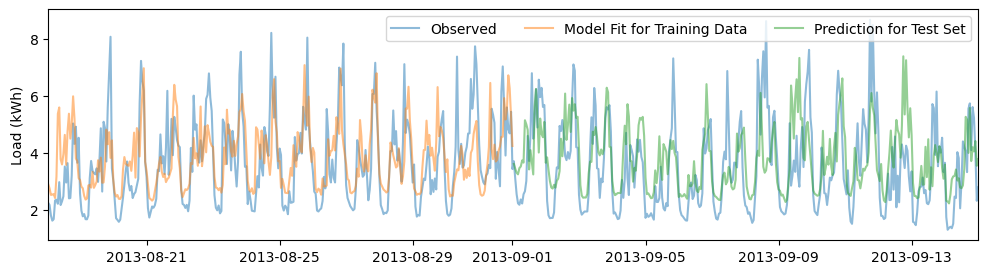

In [102]:
inspectLoad = data['Load'][startTestIndex-336:startTestIndex+336]
#print(inspectLoad)
NN12weeksAug = trainingNN1[-336:]
NN12weeksSep = testingNN1[0:336]
fig = plt.figure()
fig.set_size_inches(12,3)
ax1 = fig.add_subplot(111)
ax1.plot(inspectLoad, label='Observed', alpha=0.5);
ax1.plot(inspectLoad.index[0:336].to_numpy(), NN12weeksAug, label='Model Fit for Training Data', alpha=0.5);
ax1.plot(inspectLoad.iloc[336:].index.to_numpy(), NN12weeksSep, label='Prediction for Test Set', alpha=0.5);
ax1.set_xlim([inspectLoad.index[0],inspectLoad.index[-1]])
plt.legend(loc='best', ncol=3);
ax1.set_ylabel('Load (kWh)');

In [104]:
NN1TrainMAPE = 100*np.mean( np.abs((trainingNN1[:,0]-yData_Train)/yData_Train) )
NN1TestMAPE = 100*np.mean( np.abs((testingNN1[:,0]-yData_Test)/yData_Test) )
print('The training MAPE is %.2f'%NN1TrainMAPE)
print('The testing MAPE is %.2f'%NN1TestMAPE)

The training MAPE is 32.89
The testing MAPE is 32.37


## Code for saving your NN model
Serialise model to JSON

In [107]:
# # Serialize model to JSON
# NN1_json = NN1.to_json()
# with open("NN1.json", "w") as json_file:
#     json_file.write(NN1_json)
# # serialize weights to HDF5
# NN1.save_weights("NN1.h5")
# print("Saved model to disk")